In [1]:
import pandas as pd

df = pd.read_csv('Capital_budget_final.csv')
df.describe()

,Department,Project_Name,Scope_Of_Work,PM_Department,Project_Status,Neighborhood,Authorization_Existing,Authorization_FY,Authorization_Future,Grant_Existing,GO_Expended,Capital_Year_0,CapitalYear_1,Capital_Year_25,Grant_Expended,Grant_Year_0,Grant_Year_1,GrantYear_25,External_Funds,Total_Project_Budget
count,407,407,407,407,407,378,407,407,407,407,407,407,407,407,407,407,407,407,407,407
unique,17,406,381,19,9,26,172,82,41,51,118,123,91,193,34,39,29,39,21,226
top,Parks and Recreation Department,BCYF Hyde Park Community Center,Engage youth across the City to create a capit...,Public Facilities Department,To Be Scheduled,Citywide,-,-,-,-,-,-,-,-,-,-,-,-,-,"1,000,000"
freq,93,2,7,138,88,67,113,254,361,348,290,245,54,87,374,367,353,363,385,29


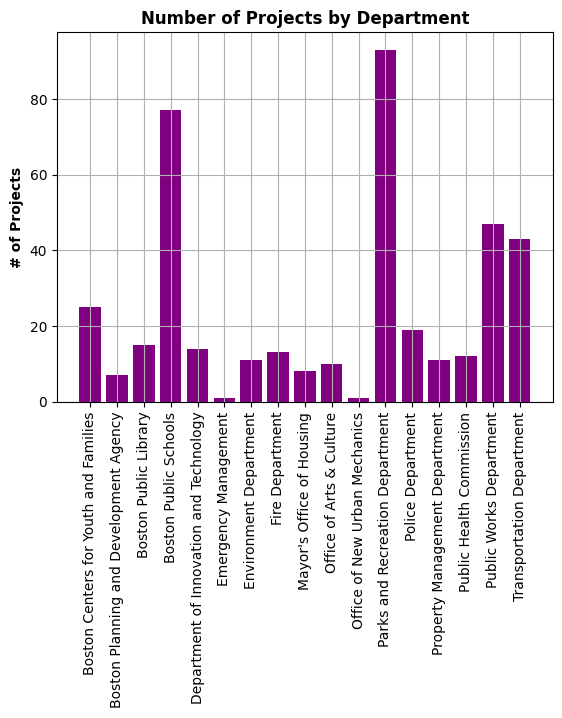

In [2]:
import numpy as np
import matplotlib.pyplot as plt

df_count = df.groupby(["Department"], as_index=False).count().rename(columns={'Project_Name':'ProjectCount'})

fig, ax = plt.subplots()
   
ax.bar(df_count["Department"], df_count["ProjectCount"], color='purple')
ax.set_ylabel('# of Projects', 
              fontweight ='bold')
ax.grid(True)
plt.xticks(rotation = 90)
ax.set_title('Number of Projects by Department', fontsize = 12, fontweight ='bold')
plt.show()

In [3]:
df_count = df["Total_Project_Budget"].str.split(",").apply(lambda numbers: ''.join(numbers))
df["Total_Project_Budget"] = df_count.astype('int')

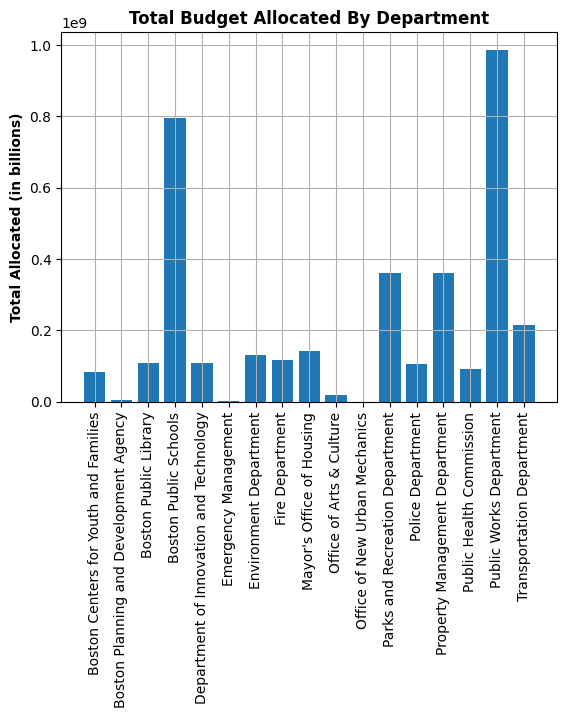

In [4]:
df_count = df[["Department", "Total_Project_Budget"]].groupby(["Department"], as_index=False).sum().rename(columns={'Total_Project_Budget':'Total_Department_Budget_Allocation'})

fig, ax = plt.subplots()
   
ax.bar(df_count["Department"], df_count["Total_Department_Budget_Allocation"])
ax.set_ylabel('Total Allocated (in billions)', 
              fontweight ='bold')
ax.grid(True)
plt.xticks(rotation = 90)
ax.set_title('Total Budget Allocated By Department', fontsize = 12, fontweight ='bold')
plt.show()

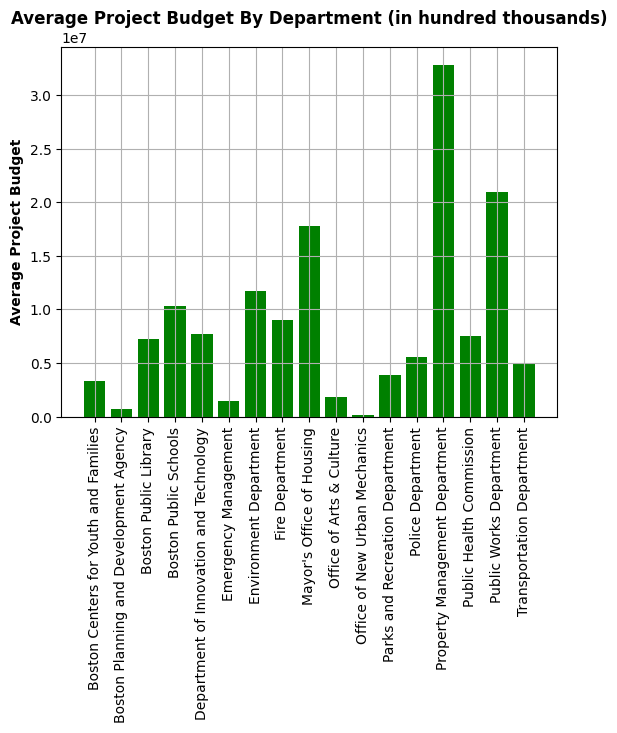

In [5]:
df_count = df[["Department", "Total_Project_Budget"]].groupby(["Department"], as_index=False).mean().rename(columns={'Total_Project_Budget':'Average_Project_Budget'})

fig, ax = plt.subplots()
   
ax.bar(df_count["Department"], df_count["Average_Project_Budget"], color='green')
ax.set_ylabel('Average Project Budget', 
              fontweight ='bold')
ax.grid(True)
plt.xticks(rotation = 90)
ax.set_title('Average Project Budget By Department (in hundred thousands)', fontsize = 12, fontweight ='bold')
plt.show()

In [6]:
df.loc[ df["Neighborhood"] == "Various neighborhoods", "Neighborhood"] = "Various Neighborhoods"

In [32]:
df_count = df[["Neighborhood", "Total_Project_Budget"]].groupby(["Neighborhood"], as_index=False).sum().rename(columns={'Total_Project_Budget':'Projects_Sum'})
print(df_count)
#df_count.to_csv("projectbudgetcount.csv")

                      Neighborhood  Projects_Sum
0                 Allston/Brighton      46360000
1                         Back Bay      58293934
2                      Bay Village       1525000
3                      Beacon Hill      26100000
4                      Charlestown     479502390
5                        Chinatown     238872172
6                         Citywide     680174651
7                       Dorchester     139578681
8                      East Boston     101632890
9                   Fenway/Kenmore     239348258
10     Financial District/Downtown     128850000
11  Government Center/Faneuil Hall     209323273
12                  Harbor Islands     134396224
13                       Hyde Park       6520000
14                   Jamaica Plain      73850000
15                        Mattapan      48821850
16                    Mission Hill       7497212
17                       North End      11975000
18                      Roslindale       8240000
19                  

In [33]:
populations = [(28621+48330), 19588, 1312, 9336, 19120, 7143, 654776, 122191, 43066, 37733, 13451, 13451, 401, 33009, 41012, 23834, 17886, 10805, 29386, 54905, (37917+5579), 29373, 7705, 31561, 50367]
df_count["Population"] = populations

In [34]:
normalized_sum = df_count["Projects_Sum"]/df_count["Population"]
df_count["Normalized_Sum"] = normalized_sum

In [21]:
print(df_count.index.tolist())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


In [36]:
df_count = df_count.drop(labels=12, axis=0)
print(df_count)

                      Neighborhood  Projects_Sum  Population  Normalized_Sum  \
0                 Allston/Brighton      46360000       76951      602.461307   
1                         Back Bay      58293934       19588     2976.002348   
2                      Bay Village       1525000        1312     1162.347561   
3                      Beacon Hill      26100000        9336     2795.629820   
4                      Charlestown     479502390       19120    25078.576883   
5                        Chinatown     238872172        7143    33441.435251   
6                         Citywide     680174651      654776     1038.789832   
7                       Dorchester     139578681      122191     1142.299196   
8                      East Boston     101632890       43066     2359.933358   
9                   Fenway/Kenmore     239348258       37733     6343.207749   
10     Financial District/Downtown     128850000       13451     9579.213441   
11  Government Center/Faneuil Hall     2

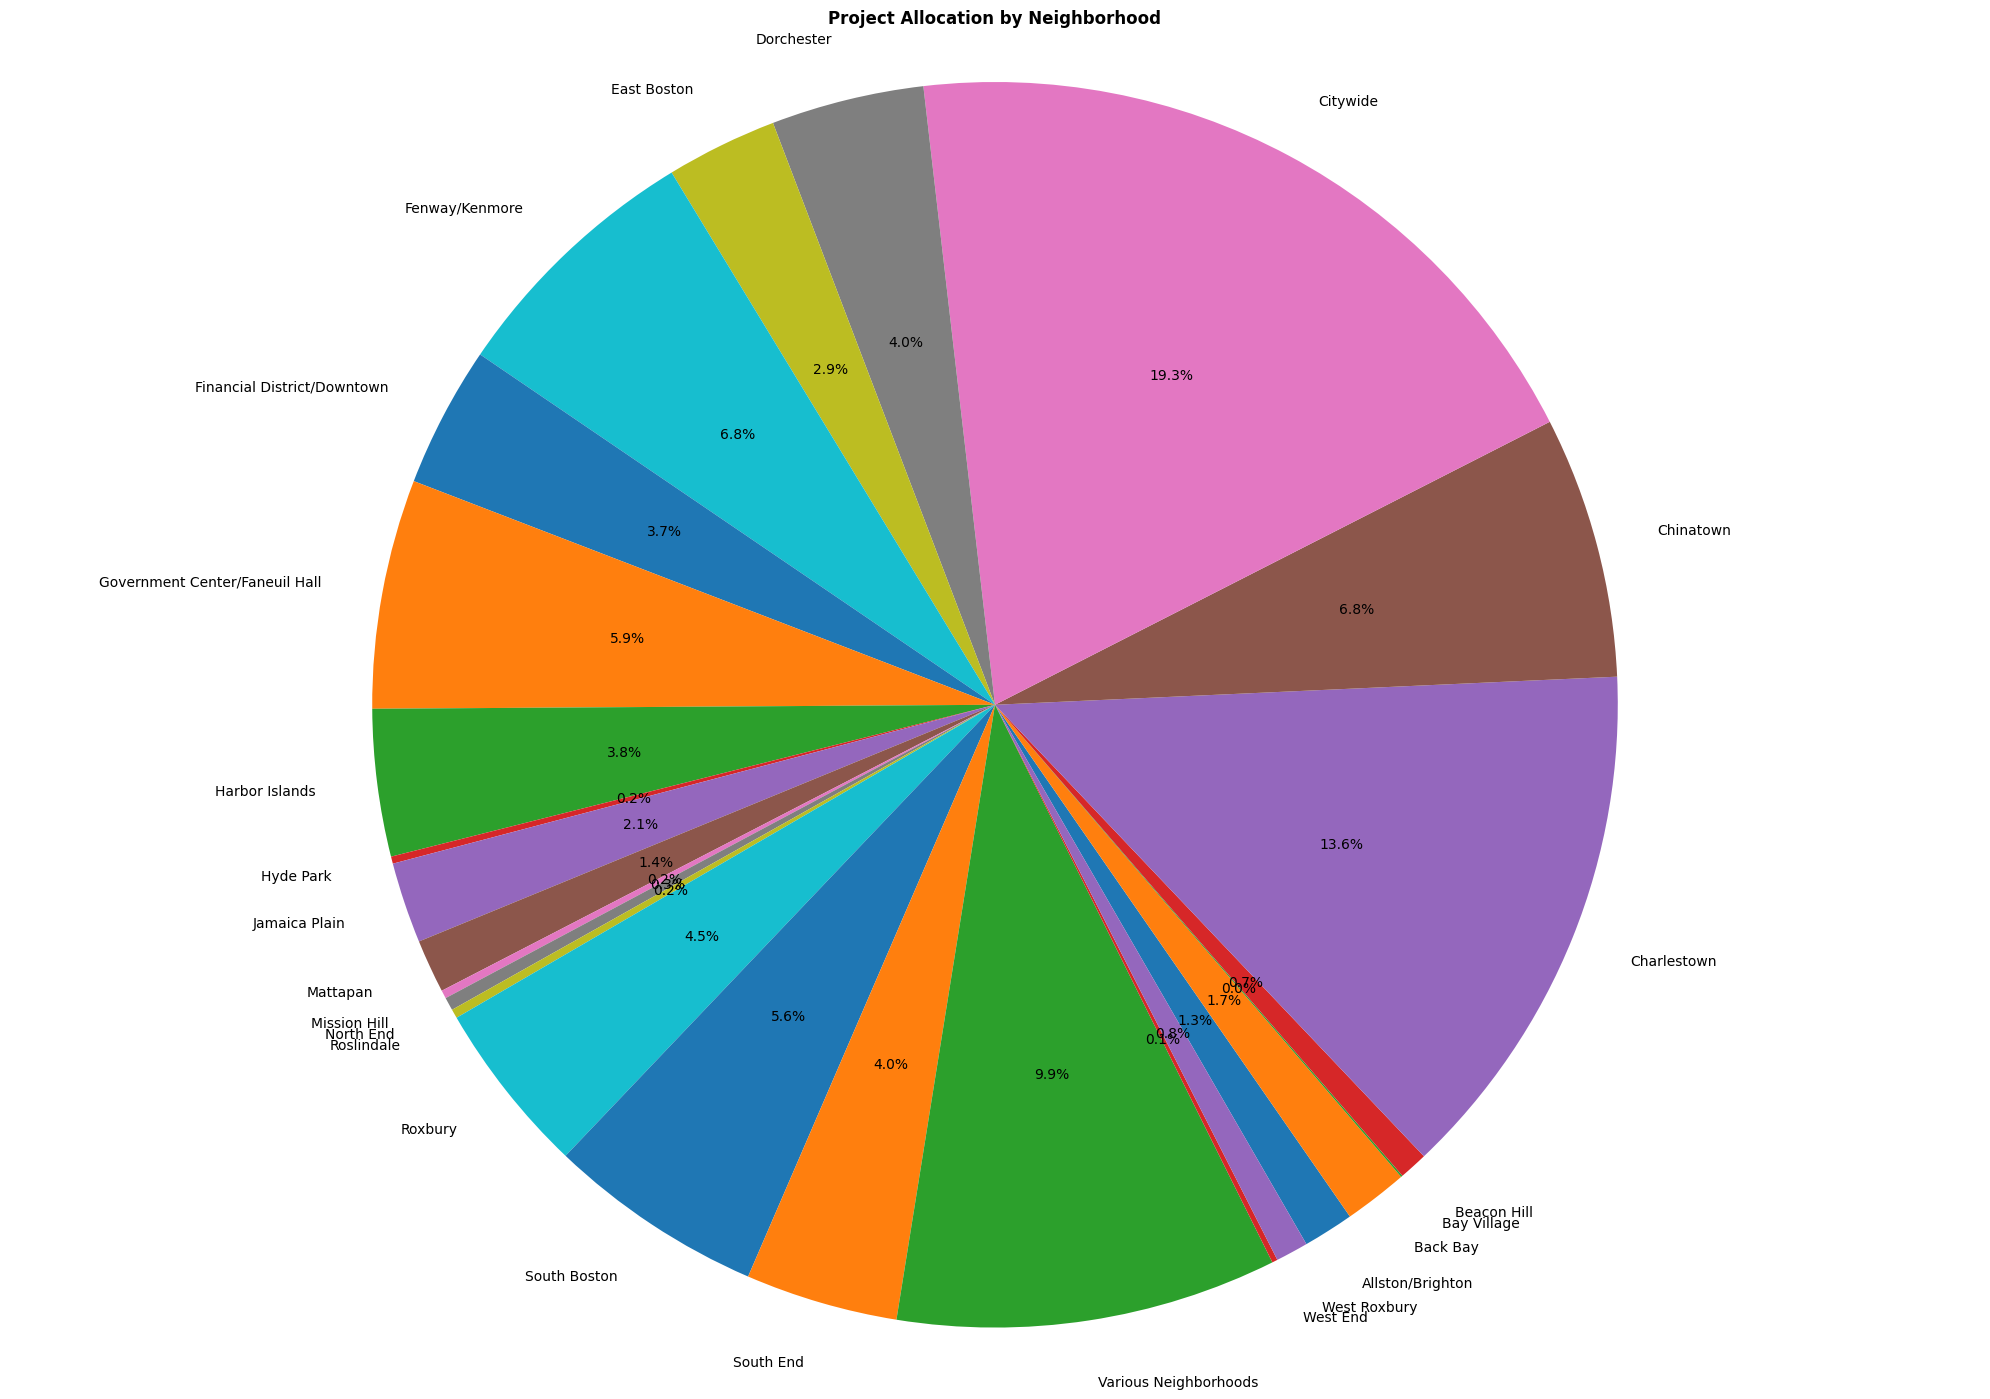

In [138]:
df_count = df[["Neighborhood", "Total_Project_Budget"]].groupby(["Neighborhood"], as_index=False).sum().rename(columns={'Total_Project_Budget':'Projects_Sum'})

labels = df_count["Neighborhood"]
total_sum = df_count["Projects_Sum"].sum()
df_count["ProjectProp"] = df_count["Projects_Sum"]/total_sum
sizes = df_count["ProjectProp"]
#explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize =(20, 14))

ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=-60)
ax1.set_title("Project Allocation by Neighborhood", fontweight ='bold')

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

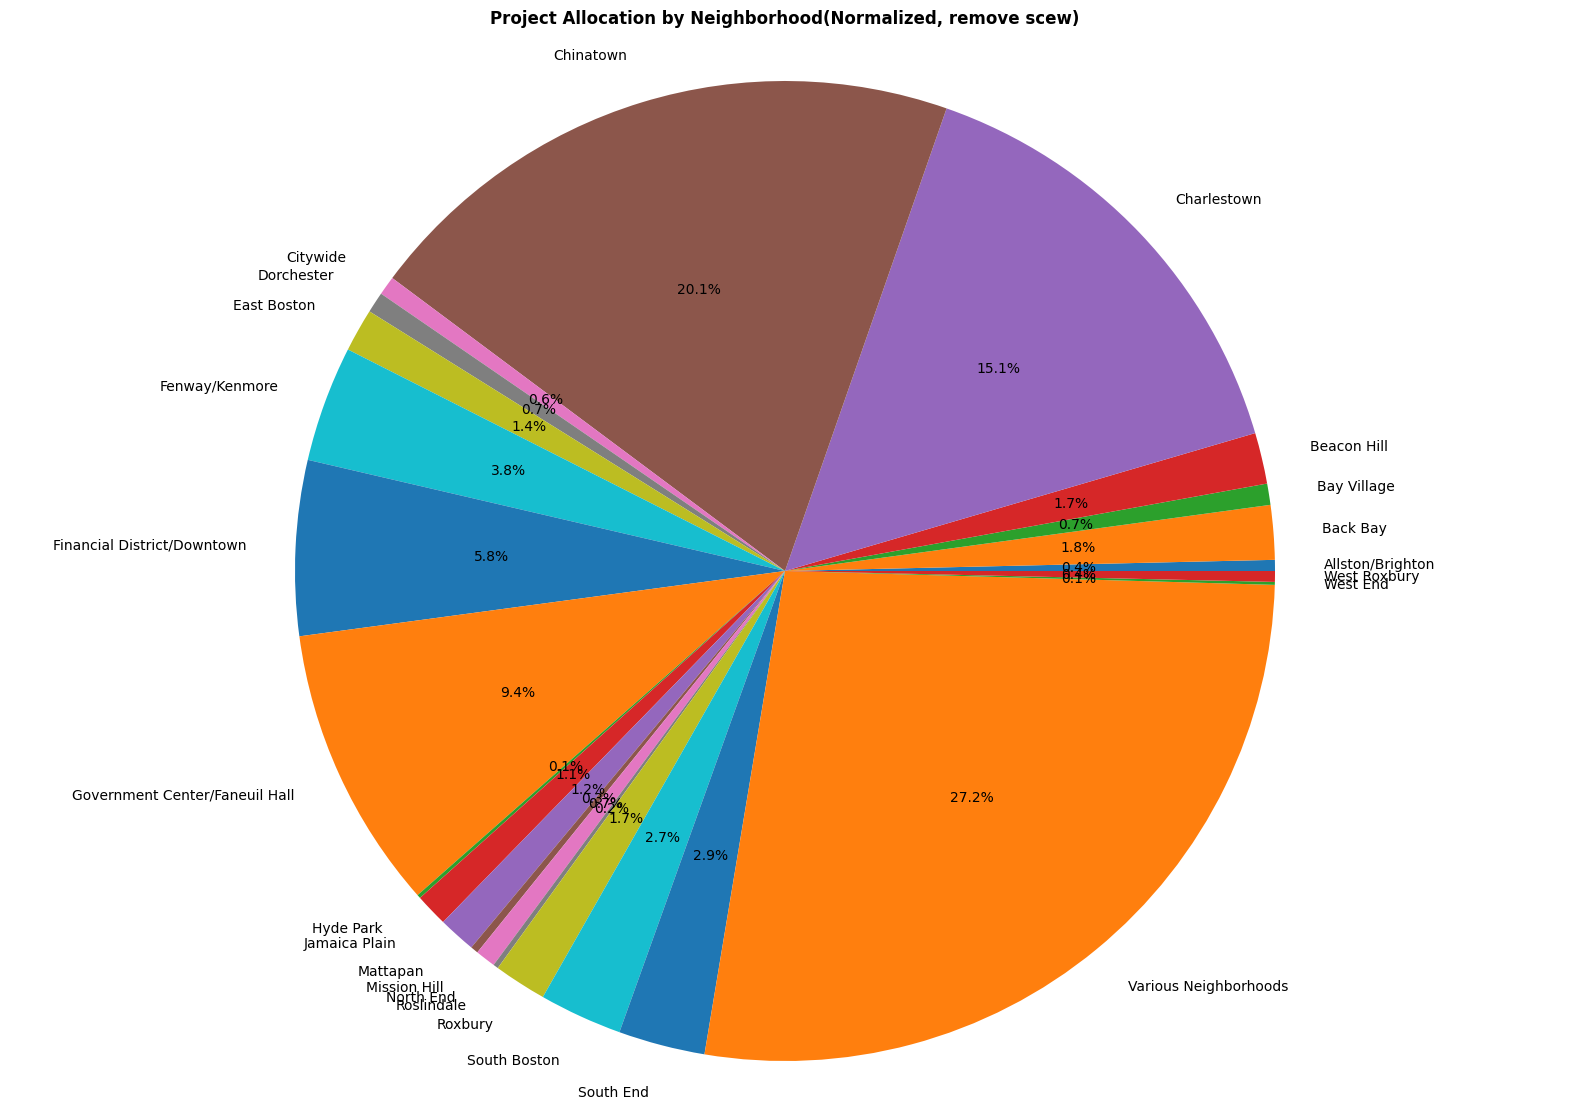

In [37]:
labels = df_count["Neighborhood"]
total_sum = df_count["Normalized_Sum"].sum()
df_count["ProjectProp"] = df_count["Normalized_Sum"]/total_sum
sizes = df_count["ProjectProp"]
#explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize =(20, 14))

ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=0)
ax1.set_title("Project Allocation by Neighborhood(Normalized, remove scew)", fontweight ='bold')

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# plt.tight_layout()
plt.show()

In [134]:
# df.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Department              0 non-null      object
 1   Project_Name            0 non-null      object
 2   Scope_Of_Work           0 non-null      object
 3   PM_Department           0 non-null      object
 4   Project_Status          0 non-null      object
 5   Neighborhood            0 non-null      object
 6   Authorization_Existing  0 non-null      object
 7   Authorization_FY        0 non-null      object
 8   Authorization_Future    0 non-null      object
 9   Grant_Existing          0 non-null      object
 10  GO_Expended             0 non-null      object
 11  Capital_Year_0          0 non-null      object
 12  CapitalYear_1           0 non-null      object
 13  Capital_Year_25         0 non-null      object
 14  Grant_Expended          0 non-null      object
 15  Grant_Year_0      

In [124]:
temp = df.where(df["Neighborhood"] == "Various neighborhoods").dropna()
temp["Neighborhood"] = "Various Neighborhoods"
df.merge(temp, how='inner')
df.head()


,Department,Project_Name,Scope_Of_Work,PM_Department,Project_Status,Neighborhood,Authorization_Existing,Authorization_FY,Authorization_Future,Grant_Existing,GO_Expended,Capital_Year_0,CapitalYear_1,Capital_Year_25,Grant_Expended,Grant_Year_0,Grant_Year_1,GrantYear_25,External_Funds,Total_Project_Budget


In [112]:
temp = df.where(df["Department"] == "Property Management Department").dropna()
temp.sum()


Department                  Property Management DepartmentProperty Managem...
Project_Name                201 Rivermoor26 Court StreetCity Hall and City...
Scope_Of_Work               Install new backup generator and high density ...
PM_Department               Public Facilities DepartmentPublic Facilities ...
Project_Status              In DesignIn DesignIn ConstructionIn DesignIn D...
Neighborhood                West RoxburyFinancial District/DowntownGovernm...
Authorization_Existing      2,160,00040,000,000110,300,0002,200,00029,000,...
Authorization_FY             -   80,000,000 -    -   11,000,0009,375,000 -...
Authorization_Future         -    -    -    -    -    -    -    -    -    ...
Grant_Existing               -    -   23,273 -    -    -    -    -    -   ...
GO_Expended                  -    -   48,358,795 -    -   795,214 -    -  ...
Capital_Year_0               -   3,000,00038,821,447100,000300,0002,000,00...
CapitalYear_1               50,00011,000,00013,000,000500,0002,5